In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('Tweets.csv')

In [3]:
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
'''
kiem tra cac truong thong tin.
O day, cac thong tin quan trong nhat la airline_sentiment, text deu khong co null
'''

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
'''
chi lay nhung truong thong tin can thiet de thao tac
tao ra dataframe moi chi bao gom: ten hang may bay, text danh gia, label
'''

In [5]:
data = pd.DataFrame({'Sentiment': data['airline_sentiment'], 'Airline': data['airline'], 'Text': data['text']})

In [6]:
data.head()

,Sentiment,Airline,Text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [ ]:
# dem so luong nhan cua moi loai
# o day, danh gia tieu cuc (negative) la nhieu nhat

In [7]:
data['Sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: Sentiment, dtype: int64

In [8]:
data['Airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: Airline, dtype: int64

In [ ]:
'''
trong du lieu nay co tat ca 6 hang may bay
truc quan hoa du lieu:
xem xet tuong quan so luong moi loai danh gia cua tung hang may bay
'''

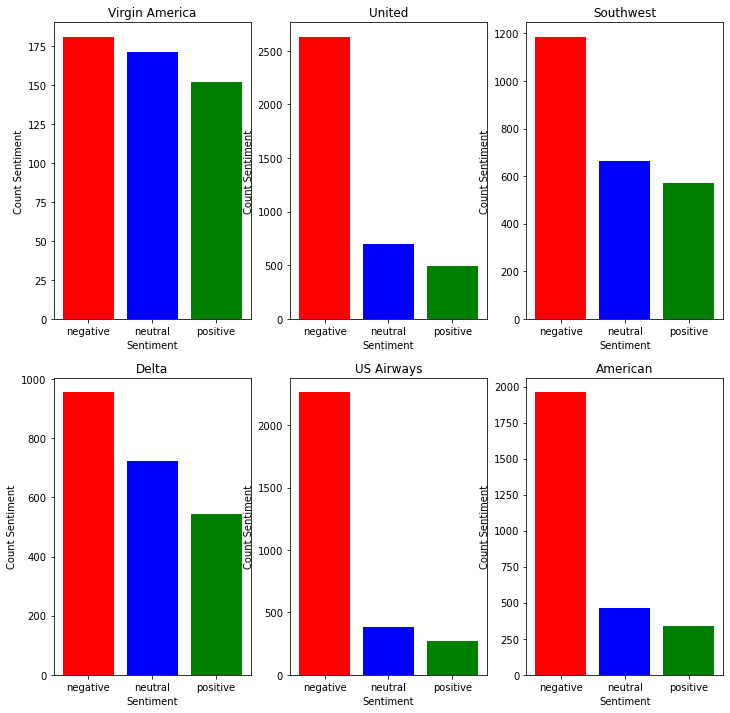

In [9]:
plt.figure(1, figsize=(12, 12))
airlines = data['Airline'].unique()
def plot_sentiment(i):
    plt.subplot(2,3,i)
    plt.bar(['negative', 'neutral', 'positive'], data[data.Airline == airlines[i-1]]['Sentiment'].value_counts(), color=['red', 'blue', 'green'])
    plt.ylabel('Count Sentiment')
    plt.xlabel('Sentiment')
    plt.title(airlines[i-1])

for index in range(1,7):
    plot_sentiment(index)

In [ ]:
'''
tien xu ly du lieu trong nhung tweet o dataset:
1. bo di toan bo so, ki hieu, tab html, chi giu lai cac tu 
2. dua toan bo tweet ve chu viet thuong, cat ra thanh tung tu
3. bo di cac stopword
4. bo di toan bo tag o dau moi text (@United, @Delta, @American, @USAirways, @Southwest, @VirginAmerica)
5. bo di cac dau cau
'''

In [10]:
import re
from nltk.corpus import stopwords

In [11]:
def split_tweet(tweet):
    letters = re.sub('[^a-zA-Z]', ' ', tweet)
    letters = re.sub(r'[^\w\s]', '', letters) 
    words = letters.lower().split()
    words = words[1:]
    stops = set(stopwords.words('english'))

    meaningful_words = [word for word in words if not word in stops]
    return (' '.join(meaningful_words))

In [12]:
data['Text'] = data['Text'].apply(lambda x: split_tweet(x))

In [13]:
data.head()

,Sentiment,Airline,Text
0,neutral,Virgin America,dhepburn said
1,positive,Virgin America,plus added commercials experience tacky
2,neutral,Virgin America,today must mean need take another trip
3,negative,Virgin America,really aggressive blast obnoxious entertainmen...
4,negative,Virgin America,really big bad thing


In [ ]:
# lemmatizer cac tu trong tweet

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tweet):
    letters = tweet.split()
    letters = [lemmatizer.lemmatize(x) for x in letters]

    return (' '.join(letters))

In [16]:
data['Text'] = data['Text'].apply(lambda x: lemmatize_text(x))

In [17]:
data.head()

,Sentiment,Airline,Text
0,neutral,Virgin America,dhepburn said
1,positive,Virgin America,plus added commercial experience tacky
2,neutral,Virgin America,today must mean need take another trip
3,negative,Virgin America,really aggressive blast obnoxious entertainmen...
4,negative,Virgin America,really big bad thing


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'].values, data['Sentiment'].values, test_size=0.3, random_state=42)

In [ ]:
# dua tweet da duoc xu ly de phan tach ra thanh nhung tu quan trong quyet dinh sentiment
# sau do, moi tweet duoc chuyen thanh mot mang chi gom cac phan tu 0 va 1. Trong tweet ban dau, tu nao co mat trong mang cac key se tro thanh 1, tu nao khong co mat se la 0

In [20]:
v = CountVectorizer()
train_features= v.fit_transform(X_train)
test_features=v.transform(X_test)

In [21]:
tdm_s = pd.DataFrame(train_features.toarray(), columns=v.get_feature_names())

In [22]:
tdm_s

,aa,aaaand,aaadvantage,aaalwayslate,aadavantage,aadelay,aadv,aadvantage,aafail,aakjumxa,...,zv,zvfmxnuelj,zvhco,zwmuoon,zwzc,zxzn,zy,zz,zza,zzkqwwbjz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# su dung 3 model: bo phan lop naive bayes, svm, randomforest

In [24]:
train_features_new = train_features.toarray()
test_features_new = test_features.toarray()

accuracys = []
models = []

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
def fit_model(classifier):
    fit = classifier.fit(train_features_new, y_train)
    pred = fit.predict(test_features_new)

    accuracy = accuracy_score(pred, y_test)
    accuracys.append(accuracy)

    models.append(classifier.__class__.__name__)

    print('Accuracy of '+ classifier.__class__.__name__ + ' is ' + str(accuracy))

    print(classification_report(pred, y_test))

In [27]:
fit_model(MultinomialNB())

Accuracy of MultinomialNB is 0.7720856102003643
              precision    recall  f1-score   support

    negative       0.95      0.78      0.86      3459
     neutral       0.38      0.68      0.49       490
    positive       0.54      0.84      0.65       443

    accuracy                           0.77      4392
   macro avg       0.62      0.77      0.67      4392
weighted avg       0.85      0.77      0.79      4392



In [29]:
fit_model(SVC(kernel='linear', C=1))

Accuracy of SVC is 0.7759562841530054
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      2888
     neutral       0.55      0.57      0.56       842
    positive       0.69      0.72      0.71       662

    accuracy                           0.78      4392
   macro avg       0.70      0.71      0.71      4392
weighted avg       0.78      0.78      0.78      4392



In [30]:
fit_model(RandomForestClassifier(n_estimators=200))

Accuracy of RandomForestClassifier is 0.7679872495446266
              precision    recall  f1-score   support

    negative       0.89      0.82      0.86      3057
     neutral       0.51      0.58      0.55       778
    positive       0.59      0.73      0.65       557

    accuracy                           0.77      4392
   macro avg       0.66      0.71      0.69      4392
weighted avg       0.79      0.77      0.77      4392

